In [5]:
import nltk
nltk.download('stopwords')
import pandas as pd
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
raw_data=open('C:\\Users\\welcome\\Documents\\NLP_SMS_ SpamDetection\\Data\\SMSSpamCollection').read()

In [7]:
raw_data[:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

**If we see the raw data we have "Tab(\t)" and "New line(\n)". Now we gonna replace "\t" with "\n" so that we only have one delimiter that is new line.**

In [8]:
parsed_data=raw_data.replace('\t','\n').split('\n')
parsed_data[:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

**Now we have data in the above format. I would like to get a list which contains only 'ham' or 'spam' and another list with only message.**

**So if you observe the above distribution of the message and label they are alternatively allinged(Keeping in mind that the delimiter is '\n' here)**

In [9]:
label_list=parsed_data[0::2]
message_list=parsed_data[1::2]# 2 here represents to jump alternatively
print(label_list[:5])
print(message_list[:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


**Lets check the length of both the list to check if the length is same or-else it will give error while creating DataFrame**

In [10]:
print(len(label_list))
print(len(message_list))

5575
5574


**So the label list contains one extra,mostly because we have alternative and it appended it in the last**

In [11]:
sms=pd.DataFrame({'Label':label_list[:-1],'SMS':message_list})
sms.head(5)

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Now lets explore the data**

In [12]:
print(sms.shape) # To check the number of columns and rows
print(sms.isnull().sum()) # To check any null values in the datset


(5574, 2)
Label    0
SMS      0
dtype: int64


So as we can see above how the data looks and to exactly specify, There are 5574 messages and two rows named "Label" and "SMS"

For null values we can see we have 0 nulls in both the rows.

**Lets see how the messages look like**

In [13]:
sms['SMS'].head(15)

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
Name: SMS, dtype: object

On the first look I can see there quite some punctuations used in messages.

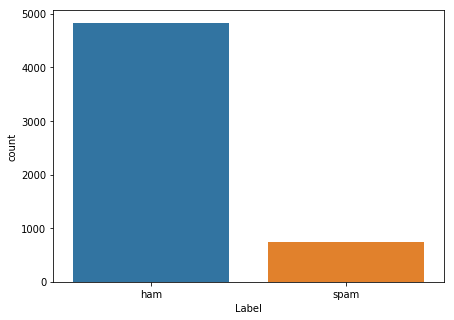

In [15]:
fig,ax1=plt.subplots(figsize=(7,5))
sns.countplot(x="Label",data=sms)


We can see number of ham SMS are quite large when compared to spam SMS.

**Lets see the exact numbers**

In [16]:
print(f'ham= {len(sms[sms["Label"] == "ham"])}')
print(f'spam= {len(sms[sms["Label"] == "spam"])}')

ham= 4827
spam= 747


So we have 4827 ham messages and 747 spam messages

**Now Lets check some attibutes or insights from the data.**

**Creating some additionals features that may help the model to understand better. Like: Text length and punctuations used.**

In [17]:
sms['Text_length']= sms['SMS'].apply(lambda x:len(x))
sms.head(6)
#sms.drop(columns='Text_len', axis=1, inplace= True)
#sms.head(6)


,Label,SMS,Text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148


**Lets see the distribution of spam and ham message's length**

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


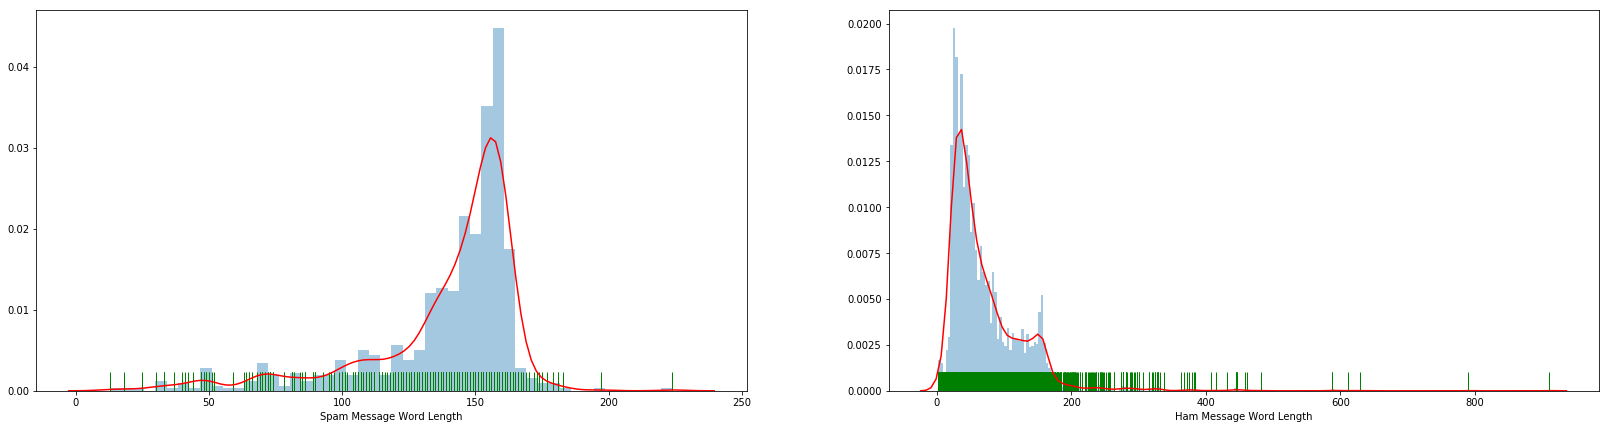

In [18]:
f, ax = plt.subplots(1, 2, figsize = (28, 7))

sns.distplot(sms[sms["Label"] == "spam"]["Text_length"], bins = 50, ax = ax[0],rug=True,kde_kws={"color": "r"},rug_kws={"color": "g"})
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(sms[sms["Label"] == "ham"]["Text_length"], bins = 250, ax = ax[1],rug=True,kde_kws={"color": "r"},rug_kws={"color": "g"})
ax[1].set_xlabel("Ham Message Word Length")

plt.show()

Spam: Here we can see the spread little uniform when compared to ham messages. Generally spam message's length is around 110-160/170

Ham: Its totally right skewed distribution. like 70% ham message's length is around >0 and <180

**Lets see the boxplot distribution of the text length to get a better understanding**

Text(0.5, 1.0, 'Text Length distribution')

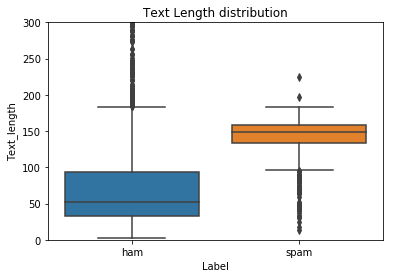

In [19]:
ax = sns.boxplot(x="Label", y="Text_length", data=sms)
ax.set(ylim=(0,300))
ax.set_title('Text Length distribution')

_So according to the boxplot distribution_:

* Ham messages's length have IQR(50% data) in range of 40-90 words. While it have it have 99.3% data in range of 5-175 words

* Spam messages's length have IQR(50% data) in range of 130-160 words. Its 99.3% data lies in range of 100-175 words


**Lets count the number of punctuations used, instead lets get punctuation % easier to understand**

In [21]:
import string
def punc_count(text):
    count_punc=sum([1 for c in text if c in string.punctuation])
    return 100*count_punc/len(text)

sms['punctuations_%']= sms['SMS'].apply(lambda x:punc_count(x))
sms.head(6)

,Label,SMS,Text_length,punctuations_%
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,5.405405


**Now we will see how much punctuation is used in spam and ham text**

Text(0.5, 1.0, 'Percentage of Punctuation text have')

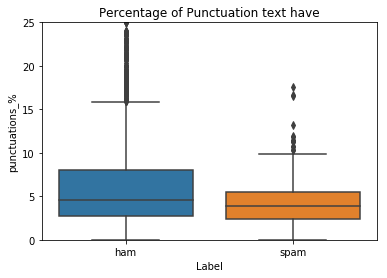

In [23]:
ax = sns.boxplot(x="Label", y="punctuations_%", data=sms)
ax.set(ylim=(0,25))
ax.set_title('Percentage of Punctuation text have')

**Spam:** Punctuation used in spam messages are comparetively less. 99.3% data lies in range of 0-12%. while the median is around 4%. 50% data have 3-5% punctuation.

**Ham:** Punctuations used in ham messages is large. 99.3% data are in range of 0-16%. while 50% data have 3-8% punctuations. Median is around 5%

**Now lets get to text cleaning part. Here I will remove the puntuations**

In [44]:
#I am creating a function that will iterate over all the characters in the texts and search for punctuation as mentioned in "string.punctuation"

def remove_punctuation(text):
    text_nopunc="".join([c for c in text if c not in string.punctuation])
    return text_nopunc

#Reason why I used join is, while I ran it gave me"," between every letters

In [45]:
sms['Clean_text']=sms['SMS'].apply(lambda x:remove_punctuation(x))
sms.head(5)

,Label,SMS,Text_length,punctuations_%,Clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689,Nah I dont think he goes to usf he lives aroun...


**Now lets convert the messages in tokens. i.e single words**

In [47]:
def tokenize(text):
    tokens=re.split('\W+',text)#W here stands for non-word and "w" stands for word, it will spilt on non-word
    return tokens

sms['text_tokens']=sms['Clean_text'].apply(lambda x:tokenize(x.lower())) #x.lower to tell python that uppercase and lowercase with spellings are same words

sms.head()

,Label,SMS,Text_length,punctuations_%,Clean_text,text_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


**I am now moving to remove the stopwords from the tokenised sentence.**

So stopwords are the words of a language which doesn't contribute much to the meaning of a sentence.

In [48]:
from nltk.corpus import stopwords
stopword= nltk.corpus.stopwords.words('english')

# Below is the function to remove stopwords(english) from the tokens
def remove_stopwords(text):
    text_no_sw= [word for word in text if word not in stopword]
    return text_no_sw

sms['Cleaner_text']=sms['text_tokens'].apply(lambda x:remove_stopwords(x))
sms.head()

,Label,SMS,Text_length,punctuations_%,Clean_text,text_tokens,Cleaner_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


**Lets move on to stemming and in particular I am using Porter Stemmer.**

Stemming is a process of reducing a word to its original form. like converting a word's plural tense form to the original form. Like reducing the branches of a tree to just its stem, thus named stemming.

In [49]:
from nltk.stem import PorterStemmer
ps=nltk.PorterStemmer()

def stemming(text_clean):
    stemmed=[ps.stem(word)for word in text_clean]
    return stemmed

In [50]:
sms['text_stemmed']=sms['Cleaner_text'].apply(lambda x:stemming(x))
sms.head(5)

,Label,SMS,Text_length,punctuations_%,Clean_text,text_tokens,Cleaner_text,text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


**Now lets move onto Vectorisation**

The textual data after processing needs to be fed into the model. Since the model doesn't accept textual data and only understands numbers, this data needs to be vectorized i.e. transforming text into a meaningful vector (or array) of numbers.

To convert string data into numerical data one can use following methods

· Bag of words

· TFIDF

· Word2Vec

WE ARE GOING TO USE Tfidf TODAY

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X_tfidf = tfidf.fit_transform(sms['SMS'])

In [53]:
X=pd.concat([sms['Text_length'], sms['punctuations_%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X.head(5)

,Text_length,punctuations_%,0,1,2,3,4,5,6,7,...,8742,8743,8744,8745,8746,8747,8748,8749,8750,8751
0,111,8.108108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,20.689655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,3.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,12.244898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,3.278689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above is the vectorized form of every messages and it is now ready to be fed to the ML model

In [79]:
Y=sms['Label']
Y.replace('ham',0, inplace= True)
Y.replace('spam',1,inplace=True)

**Now lets divide the dataset into test and train dataset, I am keeping the test dataset size to 30% of the original size**

In [81]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1) #n_jobs=-1 means the all processors CPU jobs will be running concurrently. 
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

**Lets see how the model performed** 

In [83]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(Y_test,Y_pred))
print('Accuracy Score is:'+ str(accuracy_score(Y_test,Y_pred)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1443
           1       1.00      0.78      0.88       230

    accuracy                           0.97      1673
   macro avg       0.98      0.89      0.93      1673
weighted avg       0.97      0.97      0.97      1673

Accuracy Score is:0.9695158398087268


**To Evaluate the model, I am using AUC-ROC Curve**

In [84]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)

In [85]:
rf_probs = rf_probs[:, 1]

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc = roc_auc_score(Y_test, rf_probs)
r_auc = roc_auc_score(Y_test, r_probs)

In [91]:
print('Random Forest: AUC-ROC_Score = %.3f' % (rf_auc))
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))

Random Forest: AUC-ROC_Score = 0.993
Random (chance) Prediction: AUROC = 0.500


In [92]:
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)

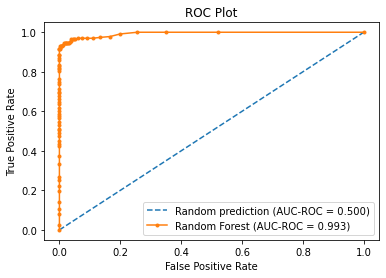

In [94]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC-ROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC-ROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()